#### Check it on Kaggle: https://www.kaggle.com/code/rajmillioman/hr-analytics-attrition-performance-analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath= os.path.join(dirname, filename) #filepath of the dataset


In [2]:
# Set the style for our visualizations
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
#Reading the dataset
df = pd.read_csv(filepath)

## 1. Initial Data Exploration

In [4]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Shape: (1470, 35)

First few rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

## Check data types

In [5]:
print("\nData Types of columns:")
display(df.dtypes)


Data Types of columns:


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Check for missing values

In [6]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Basic statistical description

In [7]:
print("\nNumerical columns statistical description:")
display(df.describe())


Numerical columns statistical description:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Convert categorical variables to appropriate type
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [9]:
# Convert numerical ratings to categorical
rating_columns = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

for col in rating_columns:
    df[col] = df[col].astype('category')

# 3. Outlier Analysis


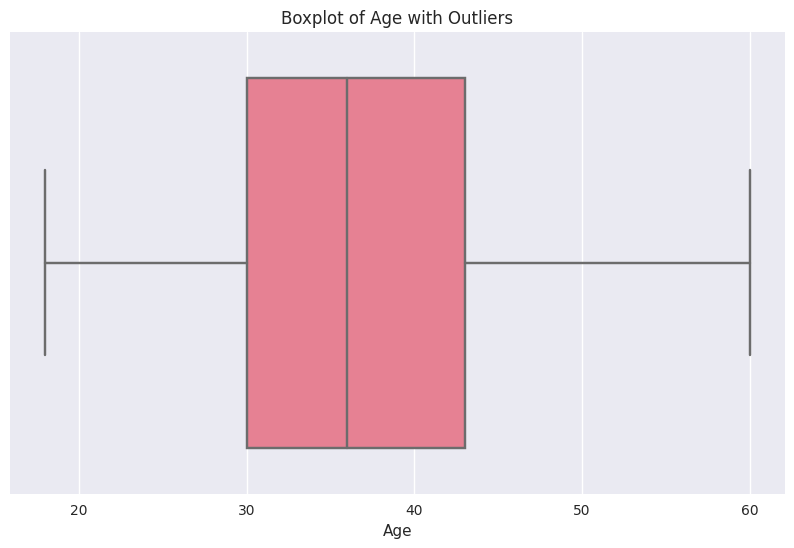


Number of outliers in Age: 0
Percentage of outliers: 0.00%
Lower bound: 10.50
Upper bound: 62.50


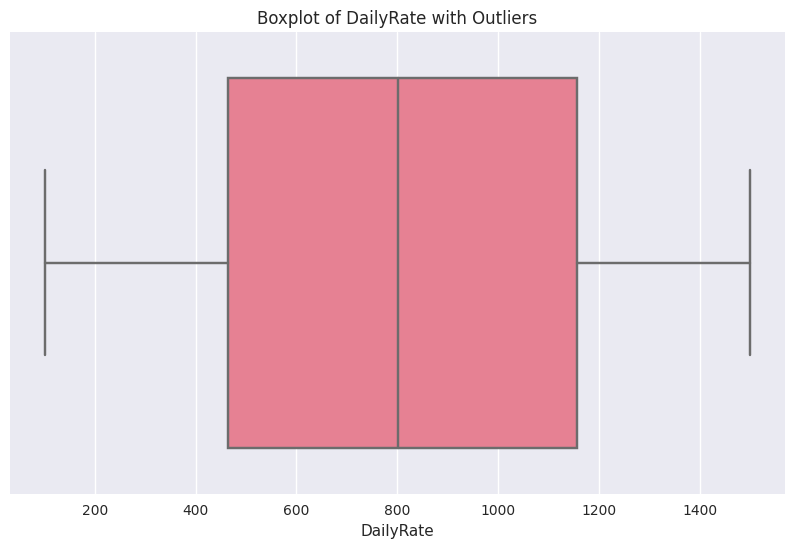


Number of outliers in DailyRate: 0
Percentage of outliers: 0.00%
Lower bound: -573.00
Upper bound: 2195.00


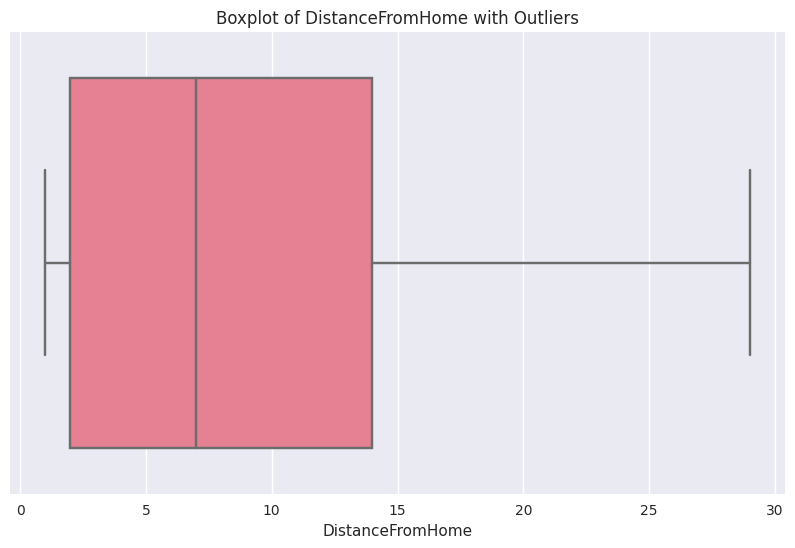


Number of outliers in DistanceFromHome: 0
Percentage of outliers: 0.00%
Lower bound: -16.00
Upper bound: 32.00


In [10]:
def plot_boxplot_with_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nNumber of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df)) * 100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")

# Check outliers in numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager']

for column in numerical_columns[:3]:  # Showing first 3 as example
    plot_boxplot_with_outliers(df, column)

## 4. Feature Engineering


In [11]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], 
                       bins=[0, 25, 35, 45, 55, 100],
                       labels=['<25', '25-35', '35-45', '45-55', '>55'])

# Calculate salary brackets
df['SalaryBracket'] = pd.qcut(df['MonthlyIncome'], q=5, 
                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Calculate experience ratio
df['ExperienceRatio'] = df['TotalWorkingYears'] / df['Age']

# Create promotion due indicator (if no promotion for 5+ years)
df['PromotionDue'] = df['YearsSinceLastPromotion'] >= 5

## 5.1 Employee Demographics Analysis

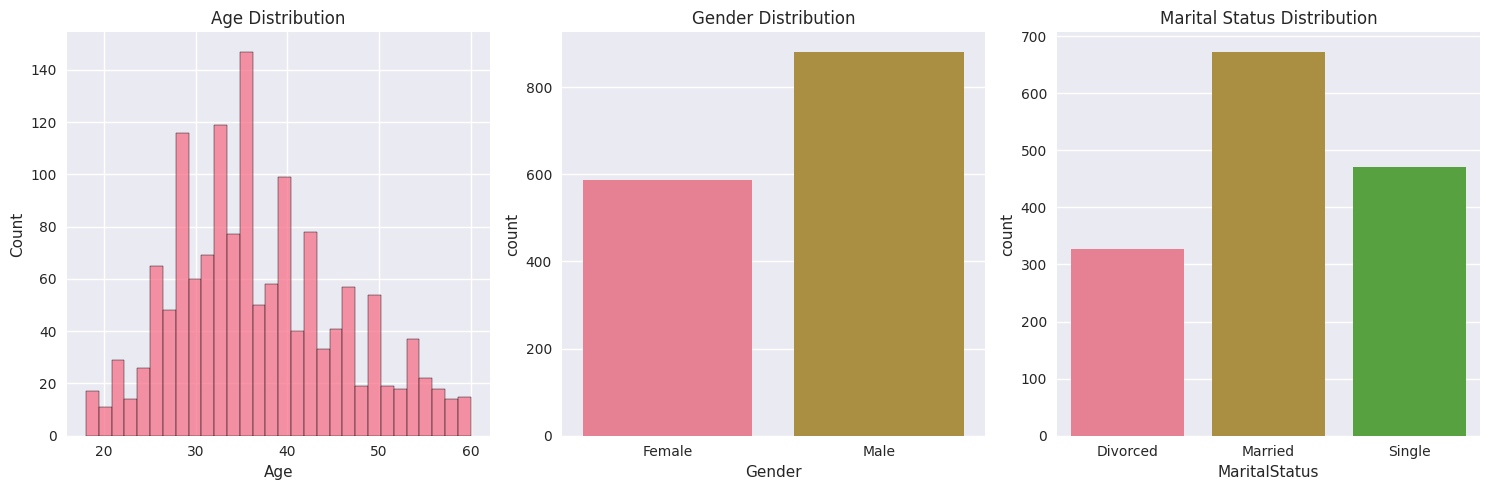

In [12]:
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(131)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

# Gender Distribution
plt.subplot(132)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

# Marital Status
plt.subplot(133)
sns.countplot(data=df, x='MaritalStatus')
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show()

## 5.2 Attrition Analysis

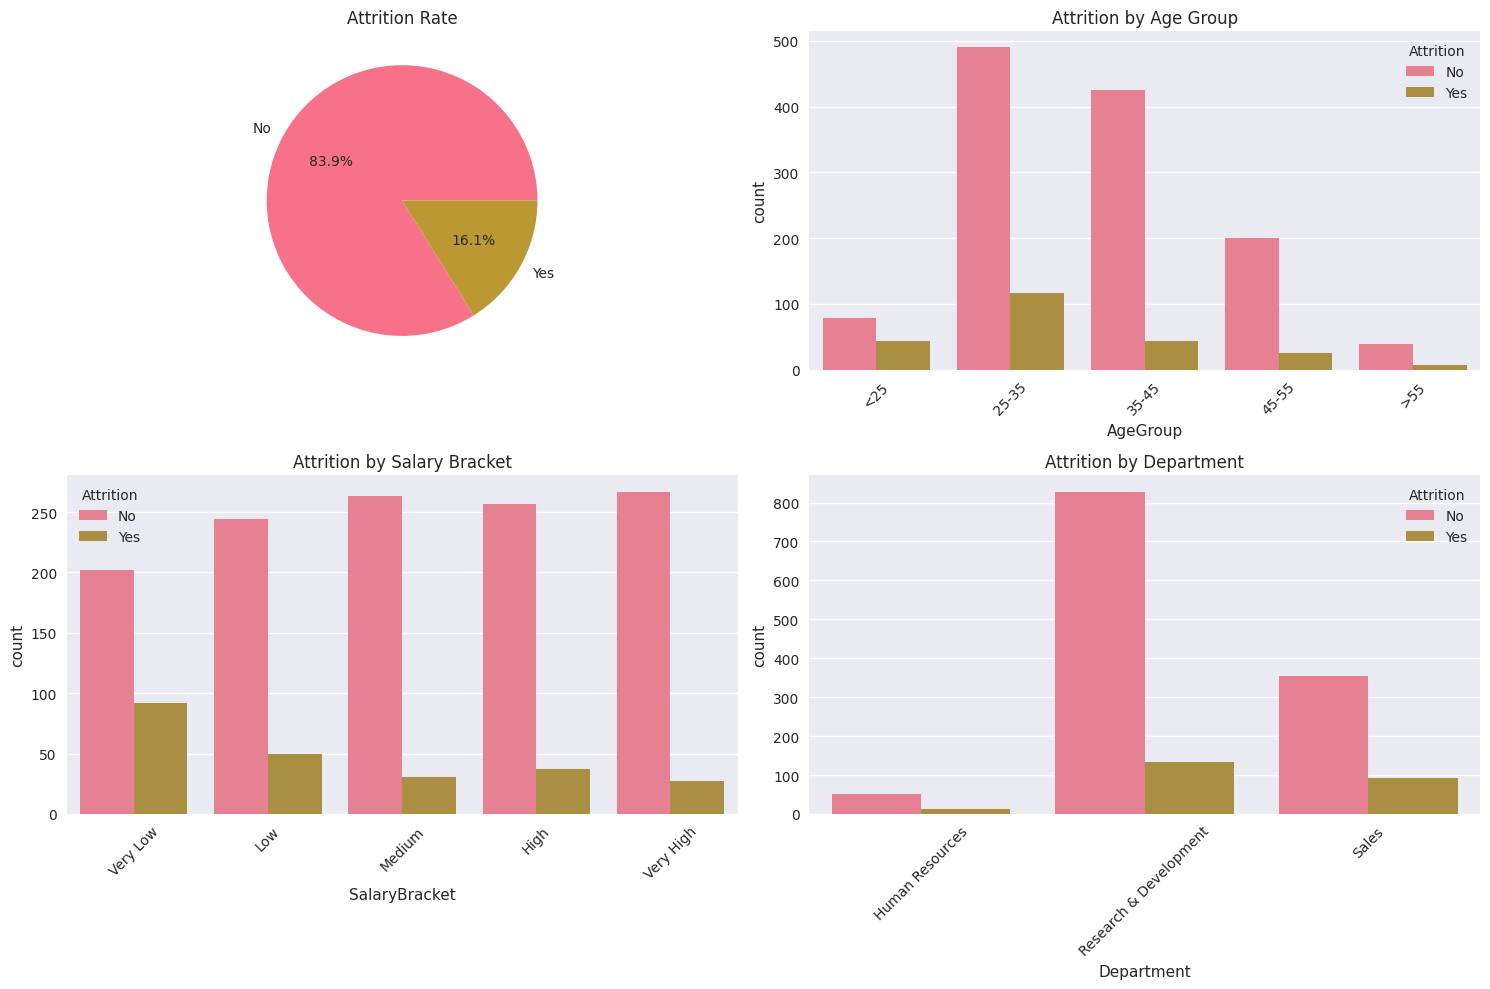

In [13]:
plt.figure(figsize=(15, 10))

# Attrition Rate
plt.subplot(221)
attrition_rate = df['Attrition'].value_counts(normalize=True)
plt.pie(attrition_rate, labels=attrition_rate.index, autopct='%1.1f%%')
plt.title('Attrition Rate')

# Attrition by Age Group
plt.subplot(222)
sns.countplot(data=df, x='AgeGroup', hue='Attrition')
plt.title('Attrition by Age Group')
plt.xticks(rotation=45)

# Attrition by Salary Bracket
plt.subplot(223)
sns.countplot(data=df, x='SalaryBracket', hue='Attrition')
plt.title('Attrition by Salary Bracket')
plt.xticks(rotation=45)

# Attrition by Department
plt.subplot(224)
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5.3 Salary Analysis

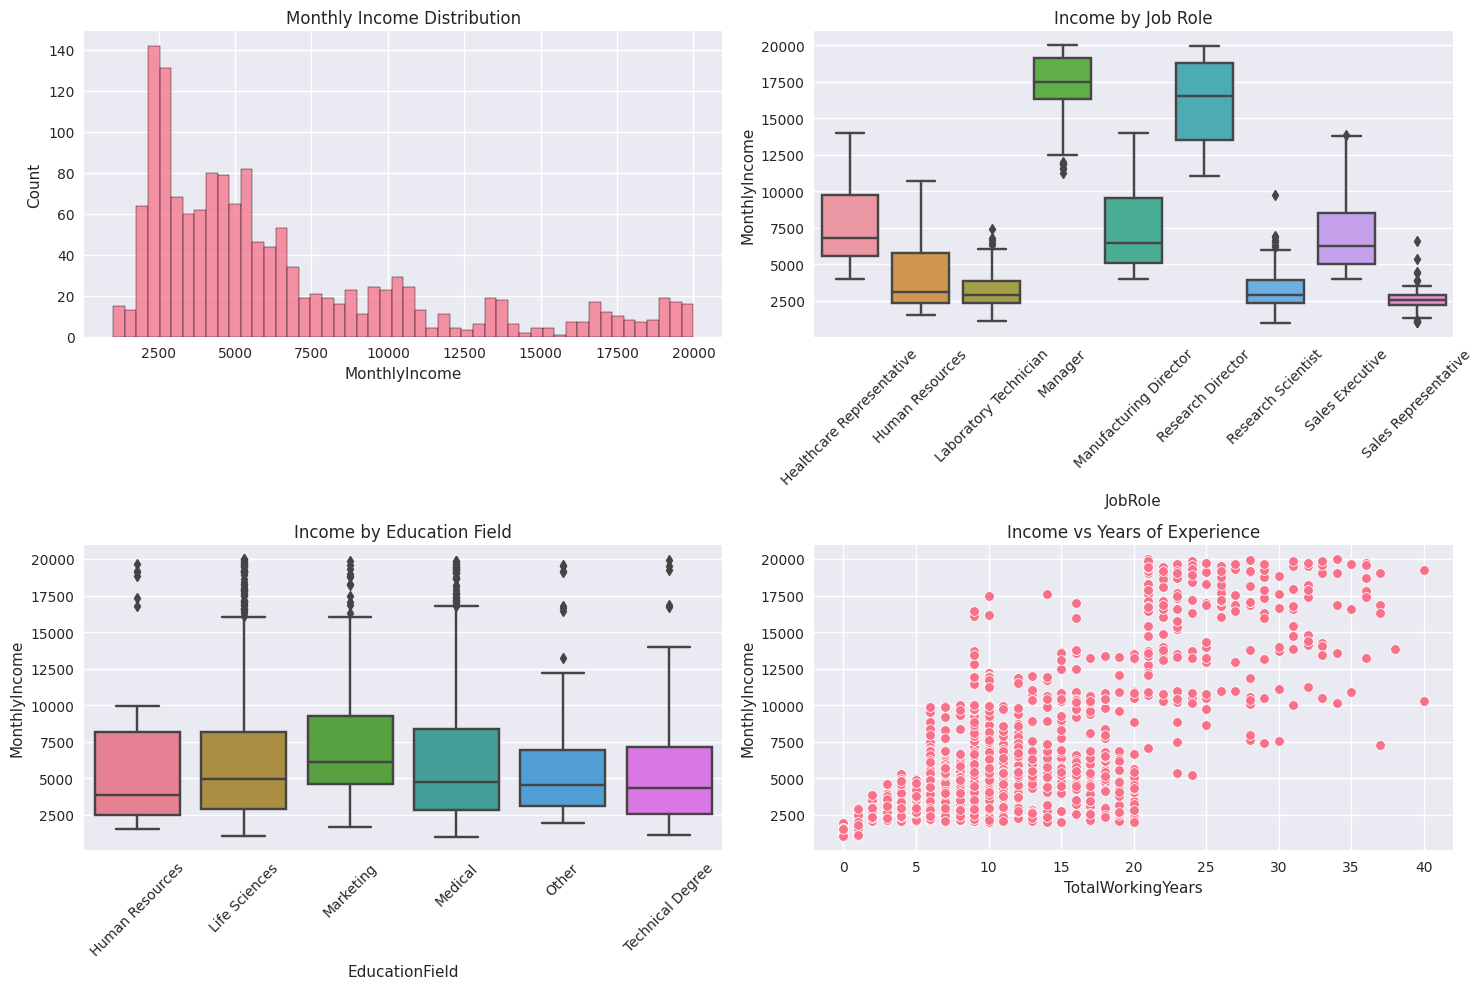

In [14]:
plt.figure(figsize=(15, 10))

# Monthly Income Distribution
plt.subplot(221)
sns.histplot(data=df, x='MonthlyIncome', bins=50)
plt.title('Monthly Income Distribution')

# Income by Job Role
plt.subplot(222)
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.title('Income by Job Role')

# Income by Education Field
plt.subplot(223)
sns.boxplot(data=df, x='EducationField', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.title('Income by Education Field')

# Income by Years of Experience
plt.subplot(224)
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')
plt.title('Income vs Years of Experience')

plt.tight_layout()
plt.show()


## 5.4 Work-Life Balance and Satisfaction

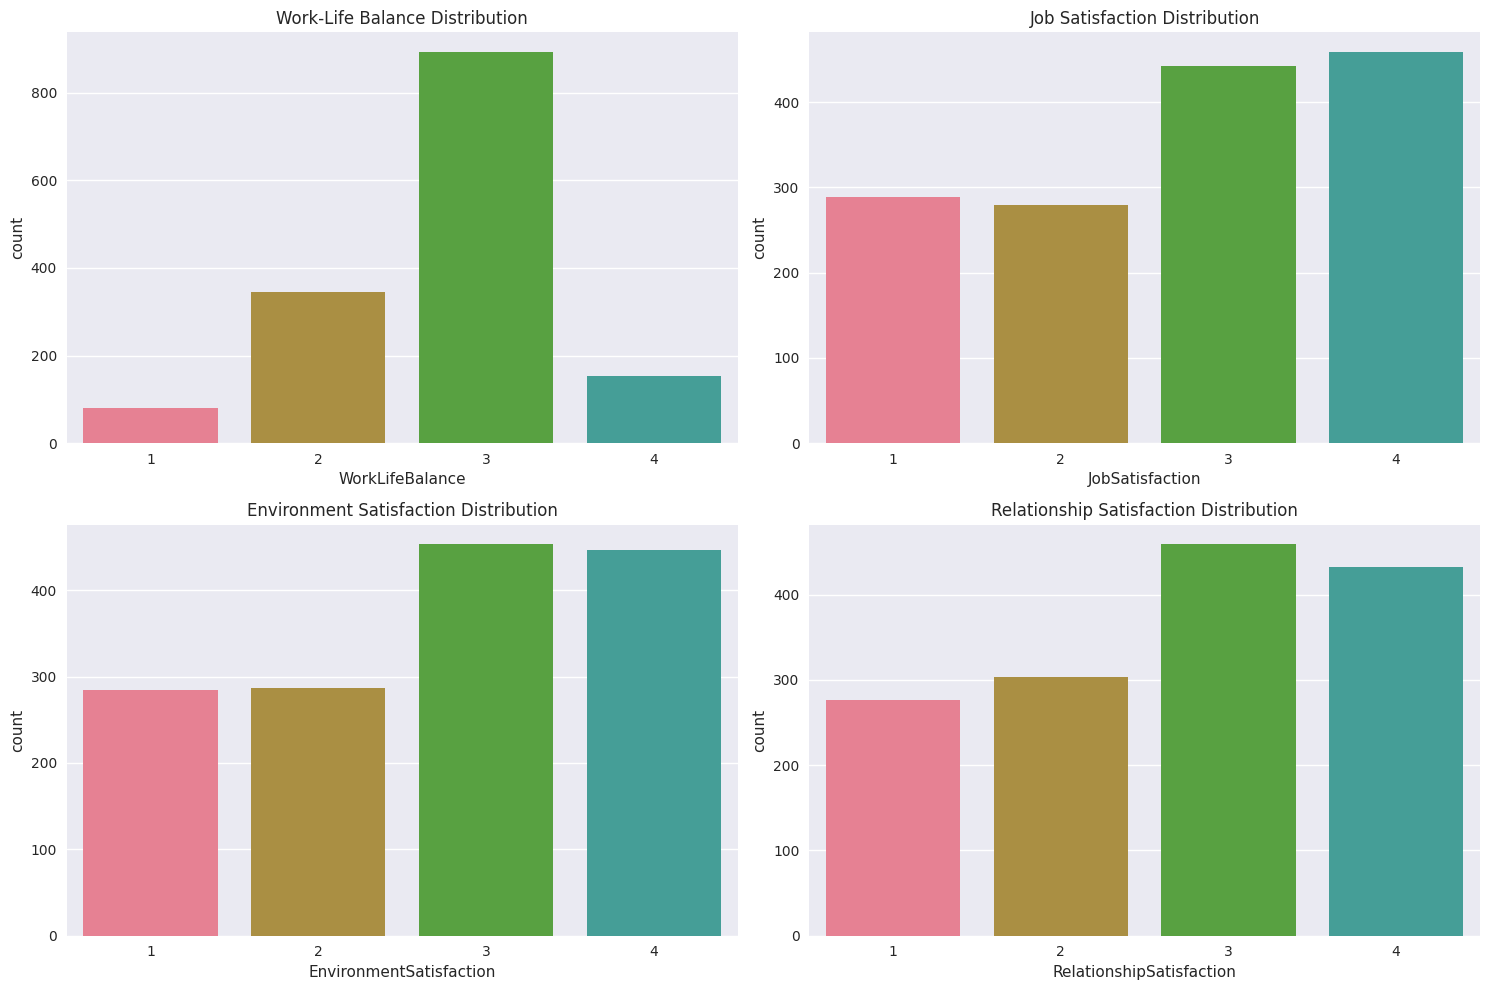

In [15]:
plt.figure(figsize=(15, 10))

# Work-Life Balance Distribution
plt.subplot(221)
sns.countplot(data=df, x='WorkLifeBalance')
plt.title('Work-Life Balance Distribution')

# Job Satisfaction
plt.subplot(222)
sns.countplot(data=df, x='JobSatisfaction')
plt.title('Job Satisfaction Distribution')

# Environment Satisfaction
plt.subplot(223)
sns.countplot(data=df, x='EnvironmentSatisfaction')
plt.title('Environment Satisfaction Distribution')

# Relationship Satisfaction
plt.subplot(224)
sns.countplot(data=df, x='RelationshipSatisfaction')
plt.title('Relationship Satisfaction Distribution')

plt.tight_layout()
plt.show()

## 5.5 Career Progression

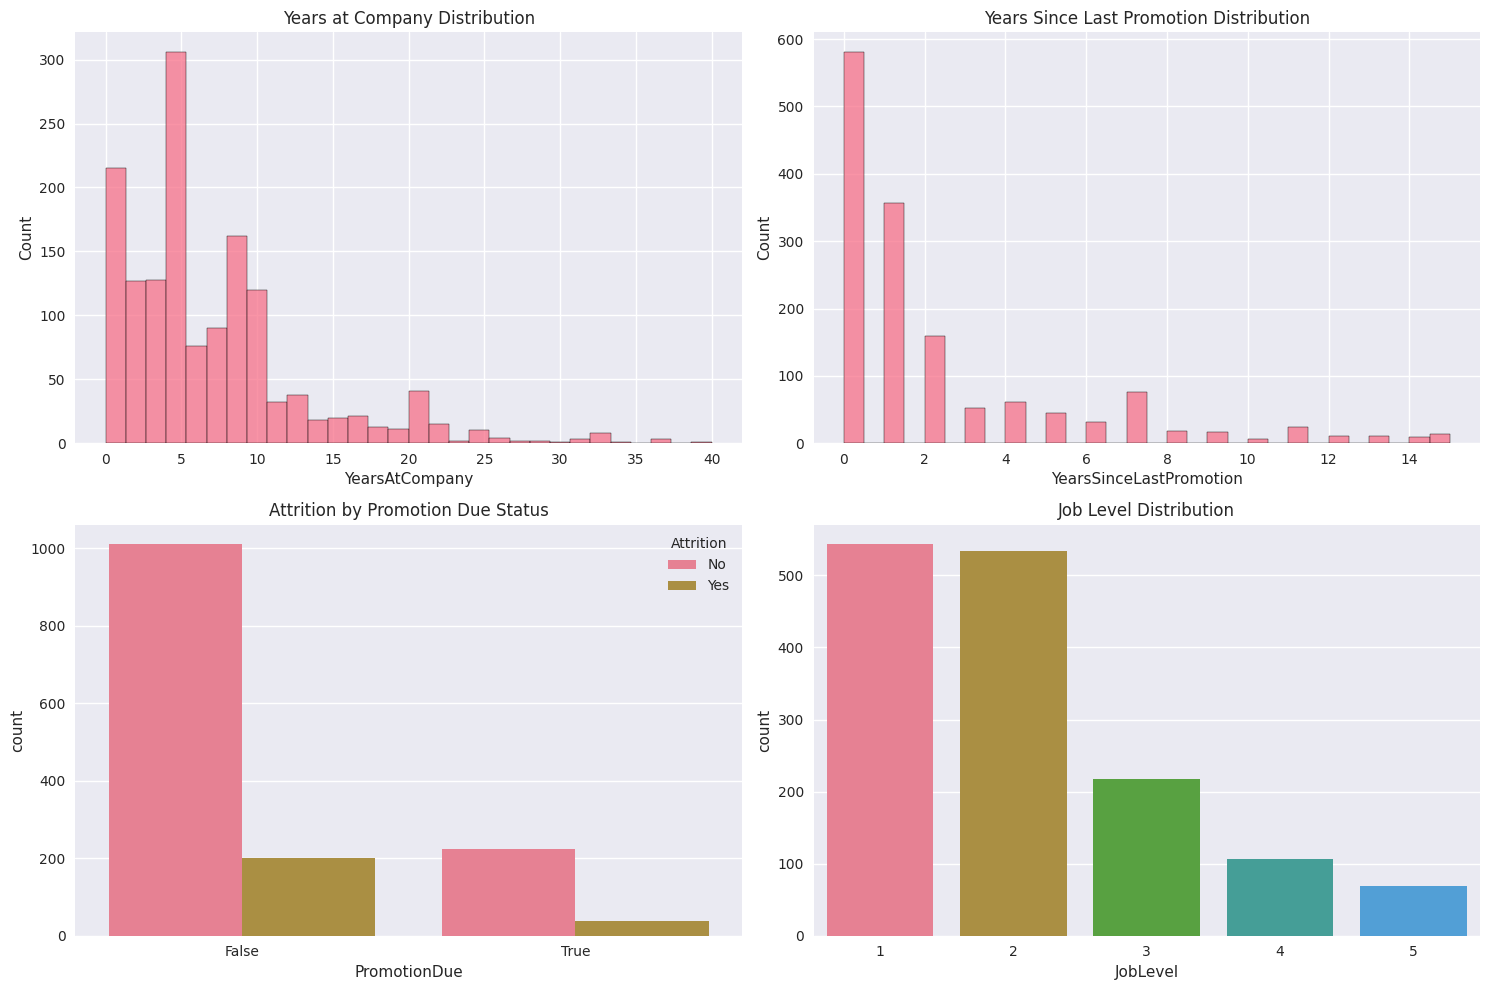

In [16]:

plt.figure(figsize=(15, 10))

# Years at Company Distribution
plt.subplot(221)
sns.histplot(data=df, x='YearsAtCompany', bins=30)
plt.title('Years at Company Distribution')

# Years Since Last Promotion
plt.subplot(222)
sns.histplot(data=df, x='YearsSinceLastPromotion', bins=30)
plt.title('Years Since Last Promotion Distribution')

# Promotion Due Analysis
plt.subplot(223)
sns.countplot(data=df, x='PromotionDue', hue='Attrition')
plt.title('Attrition by Promotion Due Status')

# Job Level Distribution
plt.subplot(224)
sns.countplot(data=df, x='JobLevel')
plt.title('Job Level Distribution')

plt.tight_layout()
plt.show()

## Statistical Analysis

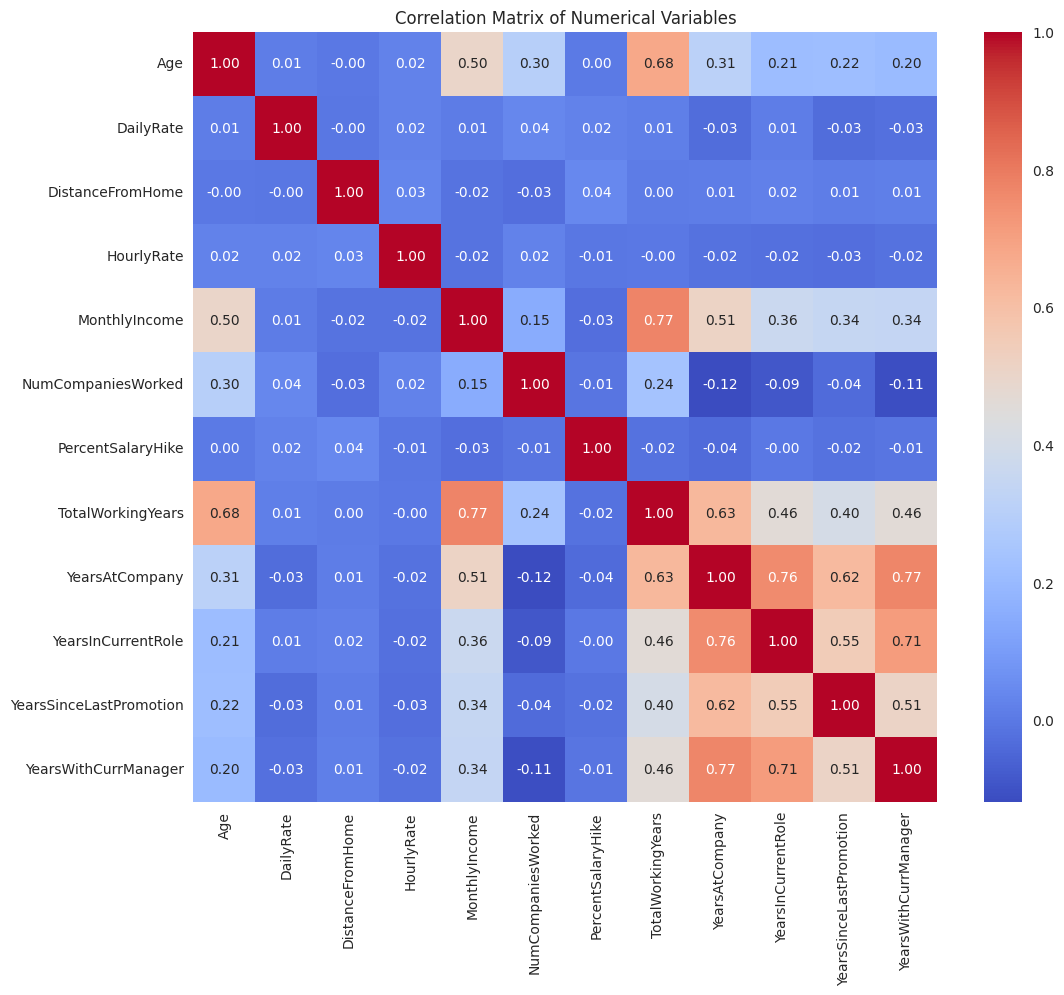


Chi-Square Tests for Categorical Variables vs Attrition:

Department:
Chi-square statistic: 10.80
p-value: 0.0045

EducationField:
Chi-square statistic: 16.02
p-value: 0.0068

Gender:
Chi-square statistic: 1.12
p-value: 0.2906

JobRole:
Chi-square statistic: 86.19
p-value: 0.0000

MaritalStatus:
Chi-square statistic: 46.16
p-value: 0.0000


In [17]:
# 6.1 Correlation Analysis for Numerical Variables
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                 'YearsWithCurrManager']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 6.2 Chi-Square Tests for Categorical Variables vs Attrition
categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

print("\nChi-Square Tests for Categorical Variables vs Attrition:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
    print(f"\n{col}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

## 7. Key Insights Summary

In [18]:

df.WorkLifeBalance = df.WorkLifeBalance.astype('int64')
df.JobSatisfaction = df.JobSatisfaction.astype('int64')
print("\nKey Insights:")
print("\n1. Attrition Rate:")
print(df['Attrition'].value_counts(normalize=True))

print("\n2. Average Monthly Income by Department:")
print(df.groupby('Department')['MonthlyIncome'].mean())

print("\n3. Average Job Satisfaction by Department:")
print(df.groupby('Department')['JobSatisfaction'].mean())

print("\n4. Work-Life Balance Statistics:")
print(df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True))

print("\n5. Most Common Reasons for Attrition:")


attrition_factors = df[df['Attrition'] == 'Yes'].agg({
    'DistanceFromHome': 'mean',
    'YearsSinceLastPromotion': 'mean',
    'WorkLifeBalance': 'median',
    'JobSatisfaction': 'median'
})
print(attrition_factors)


Key Insights:

1. Attrition Rate:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

2. Average Monthly Income by Department:
Department
Human Resources           6654.507937
Research & Development    6281.252862
Sales                     6959.172646
Name: MonthlyIncome, dtype: float64

3. Average Job Satisfaction by Department:
Department
Human Resources           2.603175
Research & Development    2.726327
Sales                     2.751121
Name: JobSatisfaction, dtype: float64

4. Work-Life Balance Statistics:
WorkLifeBalance  Attrition
1                No           0.687500
                 Yes          0.312500
2                No           0.831395
                 Yes          0.168605
3                No           0.857783
                 Yes          0.142217
4                No           0.823529
                 Yes          0.176471
Name: proportion, dtype: float64

5. Most Common Reasons for Attrition:
DistanceFromHome           10.632911
YearsSi